In [4]:
%matplotlib widget
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")
from because.synth import gen_data
from because.probability.prob import ProbSpace
from because.visualization import viz
from because.synth import read_data
from because.visualization import cmodel
from because.causality import cdisc
from math import *
from numpy.random import *
from because.utils import vprint

In [117]:
from math import log
def h0(p):
    if p > 0:
        return p * log(1/p)
    else:
        return 0
    
def h(hist):
    cum = 0
    for p in hist:
        cum += h0(p)
    return cum



def dir(ps, rv1, rv2, verbosity=0):
    d1 = ps.distr(rv1)
    d2 = ps.distr(rv2)
    hist1 = d1.ToHistogram()
    hist2 = d2.ToHistogram()
    h1 = h(hist1)
    h2 = h(hist2)
    h1_cl = []
    h2_cl = []
    v1 = ps.getValues(rv1)
    v2 = ps.getValues(rv2)
    for v in v2:
        try:
            d = ps.distr(rv1, (rv2, v))
        except:
            continue
        hist = d.ToHistogram()
        if len(hist) < 2 or len(hist) > len(v1):
            continue
        h1_cl.append(h(hist))
    for v in v1:
        try:
            d = ps.distr(rv2, (rv1, v))
        except:
            continue
        hist = d.ToHistogram()
        if len(hist) < 2 or len(hist) > len(v2):
            continue
        h2_cl.append(h(hist))
    de = de2 = 0
    if True:
        h1_c = h1_cl[0] + h1_cl[1]
        h2_c = h2_cl[0] + h2_cl[1]
        h1_cs = h1_c / len(v2)
        h2_cs = h2_c / len(v1)
        diffh1 = h1_cs
        diffh2 = h2_cs
        de = (diffh2 - diffh1) / (diffh1 + diffh2)
    if False:
        h1_c = min(h1_cl)
        h2_c = min(h2_cl)
        h1_cs = h1_c
        h2_cs = h2_c
        diffh1 = h1_cs
        diffh2 = h2_cs
        de = (diffh2 - diffh1) / (diffh1 + diffh2)
    #de = (h2 - h1) / (h2 + h1)
    vprint(1, verbosity, 'entropies', rv1, rv2, '=', h1, h2, h1_cs, h2_cs, diffh1, diffh2, de, de2)
    return de

In [120]:
# binary-binary
from because.utils import vprint
verbosity=0
runs = 1000
recs = 1000
score = 0
complete = 0
for i in range(runs):
    init = [
        'alpha = uniform(.1, .9)',
        'beta = uniform(.1, .9)',
        'gamma = uniform(.1, .9)',
    ]
    if verbosity >= 1:
        init.append('print("alpha, beta, gamma = ", alpha, beta, gamma)')
        
    sensitivity = 10
    power = 10
    MOD = ['A', 'B']
    SEM = [
            'A = binomial(1, alpha)',
            'B = binomial(1, (1-A) * beta + A * gamma)',
          ]

    gen = gen_data.Gen(sem=SEM, mod=MOD, init=init)
    ds = gen.getDataset(recs)
    ps = ProbSpace(ds, categorical=[])
    if ps.isIndependent('A', 'B', sensitivity=10):
        vprint(1, verbosity, 'independent\n')
        continue
    vprint(1, verbosity, 'P(A), P(B) = ', ps.P(('A', 1)), ps.P(('B', 1)), ps.P(('B', 1), ('A', 1)),ps.P(('A', 1), ('B', 1)))
    #print(gen.getSEM())
    rho = dir(ps, 'A', 'B', verbosity=verbosity)
    vprint(1, verbosity, 'dir =', rho, '\n')
    if rho > 0:
        score += 1
    complete += 1
    
finalScore = score / complete
        
print('runs, score = ', complete, finalScore)
    

runs, score =  741 0.6518218623481782


In [115]:

from because.utils import vprint
verbosity=0
runs = 1
recs = 10000
score = 0
complete = 0
for i in range(runs):
    init = [
        'alpha = uniform(0, 1)',
        'beta = uniform(0, 1)',
        'gamma = uniform(0,1)',
    ]
    if verbosity >= 1:
        init.append('print("alpha, beta, gamma = ", alpha, beta, gamma)')
        
    sensitivity = 10
    power = 10
    MOD = ['A', 'B']
    SEM = [
            'A = uniform(0,1)',
            'B = abs(uniform(0,1) - uniform(0,1))',
          ]

    gen = gen_data.Gen(sem=SEM, mod=MOD, init=init)
    ds = gen.getDataset(recs)
    ps = ProbSpace(ds, categorical=[])
    

    

Viz.show: Target =  [('A',)] , Condition =  []
Viz.show: Showing graph =  Univariate Probability Distribution plot. , power =  None
Test Limit =  0.1 percentile to 99.9 percentile.


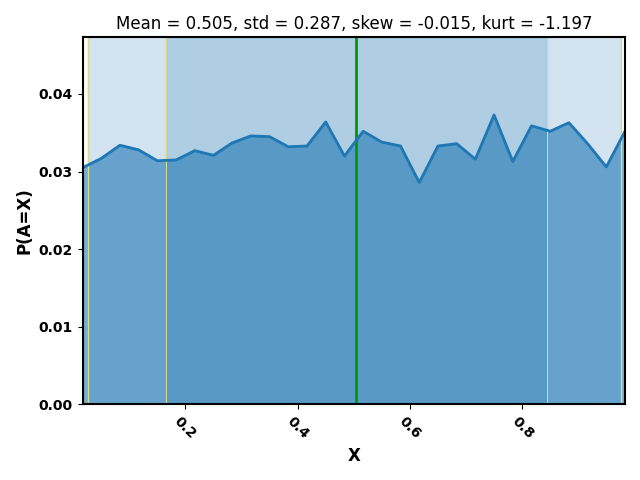

Viz.show: Target =  [('B',)] , Condition =  []
Viz.show: Showing graph =  Univariate Probability Distribution plot. , power =  None
Test Limit =  0.1 percentile to 99.9 percentile.


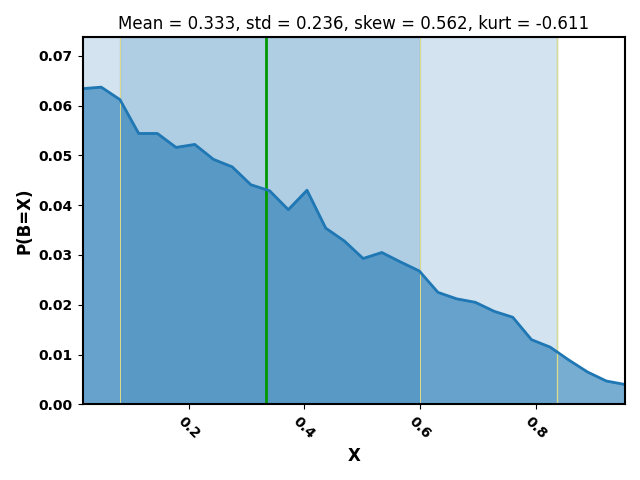

In [116]:
viz.show(probspace=ps, targetSpec=['A'],
         condSpec=[], filtSpec=[], gtype='pdf')
viz.show(probspace=ps, targetSpec=['B'],
         condSpec=[], filtSpec=[], gtype='pdf')